In [1]:
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import illustris_python as il
from tqdm import tqdm
import h5py as hp5

In [2]:
# Pylinas core modules
import Pk_library as PKL
import MAS_library as MASL

In [3]:
baseUrl = 'http://www.illustris-project.org/api/'
headers = {"api-key": "10e80f2feaf19875ee764375e874499d"}

def get(path, params=None):
     # make HTTP GET request to path
     headers = {"api-key":"10e80f2feaf19875ee764375e874499d"}
     r = requests.get(path, params=params, headers=headers)

     # raise exception if response code is not HTTP SUCCESS (200)
     r.raise_for_status()

     if r.headers['content-type'] == 'application/json':
         return r.json() # parse json responses automatically

     if 'content-disposition' in r.headers:
         filename = r.headers['content-disposition'].split("filename=")[1]
         with open(filename, 'wb') as f:
             f.write(r.content)
         return filename # return the filename string

     return r
r = get(baseUrl)

In [4]:
r.keys()

dict_keys(['simulations'])

In [5]:
names = [r['simulations'][i]['name'] for i in range(len(r['simulations']))]
names

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'TNG50-1',
 'TNG50-1-Dark',
 'TNG50-2',
 'TNG50-2-Dark',
 'TNG50-3',
 'TNG50-3-Dark',
 'TNG50-4',
 'TNG50-4-Dark',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1-Subbox2',
 'TNG

In [7]:
# getting index of Illustris-3-Subbox-2
i = names.index('Illustris-3')
print('index=', i)

sim = get(r['simulations'][i]['url'])
sim.keys()

index= 4


dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [8]:
# printing box size of simulatin and number of DM particles
print('box size:', sim['boxsize'])
print('number of DM particles:', sim['num_dm'])

box size: 75000.0
number of DM particles: 94196375


In [9]:
#getting the snapshot 
snaps = get(sim['snapshots'])

# snapshot at z=0
snap = snaps[-1]
snap

{'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_groups_subfind': 121209,
 'url': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/'}

In [10]:
# getting full metadata
meta = get(snap['url'])
meta

{'simulation': 'http://www.illustris-project.org/api/Illustris-3/',
 'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_gas': 87571556,
 'num_dm': 94196375,
 'num_trmc': 94196375,
 'num_stars': 4388167,
 'num_bhs': 33582,
 'num_groups_fof': 131727,
 'num_groups_subfind': 121209,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 23437820660.0,
 'filesize_groupcat': 114056740.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/',
 'subhalos': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQu

In [27]:
b_url = 'http://www.illustris-project.org/api/Illustris-3/'
sim_meta = get(b_url)
params = {'dm':'Coordinates'}

for i in tqdm(range(sim_meta['num_files_snapshot'])):
    file_url = b_url + "files/snapshot-135."+str(i)+".hdf5"
    saved_filename = get(file_url, params=params)

100%|██████████| 32/32 [04:57<00:00,  9.29s/it]


After downloading the data move the file to a new folder.
```
mkdir IL3
mv *.hdf5 IL3
```

# Now we will obtain data from the TNG Project

In [6]:
# getting index of Illustris-3-Subbox-2
i = names.index('TNG300-3')
print('index=', i)

sim = get(r['simulations'][i]['url'])
sim.keys()

index= 12


dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [7]:
# printing box size of simulation and number of DM particles
print('box size:', sim['boxsize'])
print('number of DM particles:', sim['num_dm'])

box size: 205000.0
number of DM particles: 244140625


In [8]:
#getting the snapshot 
snaps = get(sim['snapshots'])

# snapshot at z=0
snap = snaps[-1]
snap

{'number': 99,
 'redshift': 2.22044604925031e-16,
 'num_groups_subfind': 391144,
 'url': 'http://www.illustris-project.org/api/TNG300-3/snapshots/99/'}

In [9]:
# getting full metadata
meta = get(snap['url'])
meta

{'simulation': 'http://www.illustris-project.org/api/TNG300-3/',
 'number': 99,
 'redshift': 2.22044604925031e-16,
 'num_gas': 224519197,
 'num_dm': 244140625,
 'num_trmc': 244140625,
 'num_stars': 2182971,
 'num_bhs': 327865,
 'num_groups_fof': 377342,
 'num_groups_subfind': 391144,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 66711094264.0,
 'filesize_groupcat': 352789672.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.illustris-project.org/api/TNG300-3/snapshots/99/',
 'subhalos': 'http://www.illustris-project.org/api/TNG300-3/snapshots/99/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.illustris-project.org/api/TNG300-3/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.illustris-project.org/api/TNG300-3/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.illustris-project.org/api/TNG300-3/snapshots/99/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupca

In [16]:
b_url = 'http://www.illustris-project.org/api/TNG300-3/'
sim_meta = get(b_url)
# params = {'dm':'Coordinates'} #coordinates of DM particles
params = {'bhs':'Coordinates'}  #coordinates and mass of black holes

print("Number of files:", sim_meta['num_files_snapshot'])
for i in tqdm(range(sim_meta['num_files_snapshot']), "Getting snapshots"):
    file_url = b_url + "files/snapshot-99."+str(i)+".hdf5"
    saved_filename = get(file_url, params=params)

Number of files: 16


Getting snapshots:   0%|          | 0/16 [04:06<?, ?it/s]


KeyboardInterrupt: 

# Data analysis for Illustris data

Now we will do the data analysis.

## Plotting the DM particle distribution

In [2]:
# reading data hdf5 snapshots
basePath = "IL3/snap_135."

data = [[0,0,0]]

for i in tqdm(range(32)):
    fileName = basePath + str(i) + ".hdf5"
    f = hp5.File(fileName, 'r')
    temp = f['PartType1/Coordinates'][:]
    data = np.append(data, temp, axis=0)

100%|██████████| 32/32 [00:35<00:00,  1.11s/it]


In [3]:
from matplotlib import colors
from matplotlib import cm
from sctriangulate.colors import build_custom_continuous_cmap

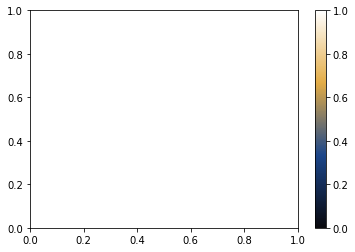

In [7]:
new_cmap = build_custom_continuous_cmap([9,9,14], [28, 70, 138], [227, 172, 70], [255,255,255])

# show the new colormap
fig,ax = plt.subplots()
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(),cmap=new_cmap),ax=ax)

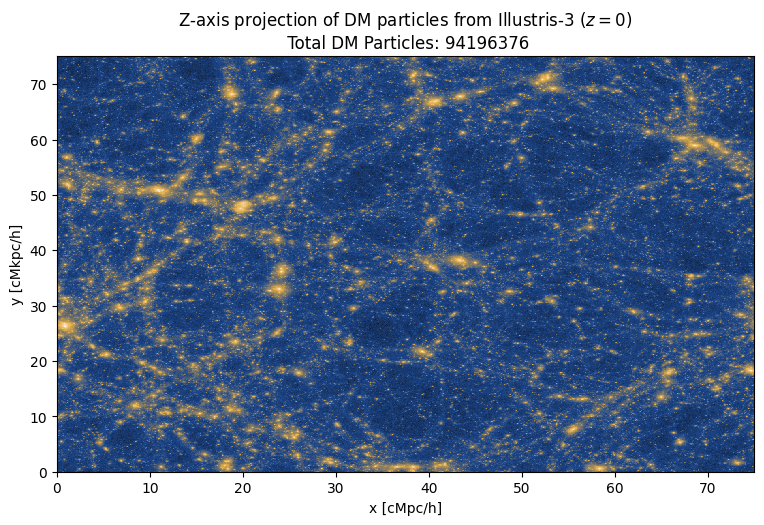

In [6]:
plt.figure(figsize=(9,5.5), dpi=100)
plt.hist2d(data[:,0]/1000, data[:,1]/1000, norm =colors.LogNorm(), cmap=new_cmap, bins=1024);
# plt.colorbar()

plt.title('Z-axis projection of DM particles from Illustris-3 ($z=0$)\n Total DM Particles: '+str(len(data)))


plt.xlabel('x [cMpc/h]')
plt.ylabel('y [cMkpc/h]')


plt.savefig('Illustris3_DM.jpg', dpi=300, bbox_inches='tight')

## Computing the 2 point correlation function

We need to compute the 2pCF using Corrfunc or Pylinas

### Computing the 2 point correlation function using Corrfunc

In [3]:
from Corrfunc.theory.DD import DD
from Corrfunc.io import read_catalog
from Corrfunc.utils import convert_3d_counts_to_cf

In [4]:
X = data[:,0] 
Y = data[:,1]
Z = data[:,2]

N = len(data)
boxsize = 75000
rand_X = np.random.uniform(0, boxsize, N)
rand_Y = np.random.uniform(0, boxsize, N)
rand_Z = np.random.uniform(0, boxsize, N)
nthreads = 10

nbins = 32
bins = np.linspace(0.0, 20, nbins+1)
# Auto pair counts in DD
autocorr=1
DD_counts = DD(autocorr, nthreads, bins, X, Y, Z,
               periodic=False, verbose=True)

autocorr=0
DR_counts = DD(autocorr, nthreads, bins, X, Y, Z,
               X2=rand_X, Y2=rand_Y, Z2=rand_Z,
               periodic=False, verbose=True)

# Auto pairs counts in RR
autocorr=1
RR_counts = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,
                periodic=False, verbose=True)


In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 100,100,100.  Time taken =   2.655 sec
Using AVX kernel
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken = 14.421 secs
ND1 =     94196376 [xmin,ymin,zmin] = [0.000000,0.000000,0.000000], [xmax,ymax,zmax] = [74999.992188,74999.992188,74999.992188]
ND2 =     94196376 [xmin,ymin,zmin] = [0.000000,0.000000,0.000000], [xmax,ymax,zmax] = [74999.999618,74999.999995,74999.998125]
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 100,100,100.  Time taken =   2.426 sec
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 100,100,100. 

Corrfunc is not working, possibly due to memory limitaitons

### Computing the 2 point correlation function using Pylinas

In [10]:
grid = 512
BoxSize = 106.5
verbose = True
Np = len(data)
MAS = 'CIC'

pos = np.array(data/1000, dtype=np.float32)
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)
delta /= np.mean(delta, dtype=np.float64);
delta -= 1.0


Using CIC mass assignment scheme
Time taken = 2.810 seconds



*Box Size* parameter still remains of reasonaable doubt.
If one look at Max(coord) then it is `75 MPc`, however on the other hand, the project page mentions it to be `106.5 MPc`.

In [11]:
# compute the correlation function
axis = 0
threads=12
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)


Computing correlation function of the field...
Time to complete loop = 0.81
Time taken = 4.56 seconds


In [12]:
# get the attributes
r      = CF.r3D      #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)
xi4    = CF.xi[:,2]  #correlation function (hexadecapole)
Nmodes = CF.Nmodes3D #number of modes

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


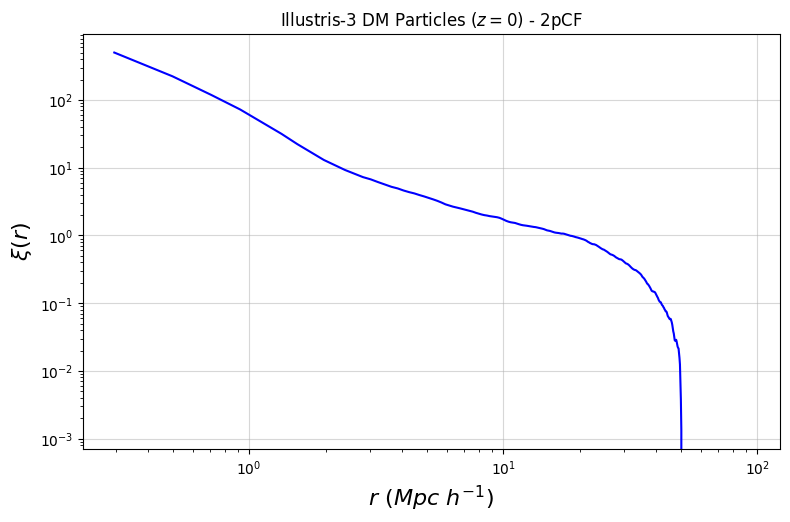

In [13]:
# log-log plot

plt.figure(figsize=(9,5.5), dpi=100)
plt.loglog(r, xi0, color='blue')
plt.grid(alpha=0.5)

plt.title('Illustris-3 DM Particles ($z=0$) - 2pCF')
plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

plt.savefig('2pCF_106.jpg', dpi=300, bbox_inches='tight')

# Analysis for `TNG` data
We will plot the DM distibution from the Illustris project and then will compute the 2pCF

Since this is compute intensive, run this as a script rather than a notebook. The required script is `plot.py`

In [3]:
# reading data hdf5 snapshots
basePath = "TNG300-3/snap_099."

data = [[0,0,0]]

for i in tqdm(range(16)):
    fileName = basePath + str(i) + ".hdf5"
    f = hp5.File(fileName, 'r')
    temp = np.array(f['PartType1/Coordinates'][:], dtype=np.float32)
    data = np.append(data, temp, axis=0)

100%|██████████| 16/16 [01:53<00:00,  7.08s/it]


In [ ]:
# plotting
plt.figure(figsize=(9,5.5), dpi=100)
plt.hist2d(data[:,0], data[:,1], norm =colors.LogNorm(), cmap=new_cmap, bins=2048);

plt.title('Z-axis projection of DM particles from TNG300-3 ($z=0$)\n Total DM Particles: '+str(len(data)))

plt.xlabel('x [c kpc/h]')
plt.ylabel('y [c kpc/h]')

plt.savefig('TNG300_DM.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Computing 2pCF

In [ ]:
## computing xi(r)
grid = 512
BoxSize = 302.6
verbose = True
Np = len(data)
MAS = 'CIC'

print("Getting position and delta array")
pos = np.array(data/1000, dtype=np.float32)
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
print("Constructing 3D density field")
MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)
delta /= np.mean(delta, dtype=np.float64);
delta -= 1.0

# compute the correlation function
print("Computing correlation function")
axis = 0
threads=12
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)


# get the attributes
print("Getting attributes")
r      = CF.r3D      #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)
xi4    = CF.xi[:,2]  #correlation function (hexadecapole)
Nmodes = CF.Nmodes3D #number of modes

# log-log plot
print("Plotting")
plt.figure(figsize=(9,5.5), dpi=100)
plt.loglog(r, xi0, color='blue')
plt.grid(alpha=0.5)

plt.title('TNG300-3 DM Particles ($z=0$) - 2pCF')
plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

plt.savefig('2pCF_TNG300.jpg', dpi=300, bbox_inches='tight')
plt.show()
